# 1. Maintain same Directory for the file

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\nmnko\\Documents\\vscode-projects\\Global-Electric-Vehicle-sales-trends-from-2010-2024\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\nmnko\\Documents\\vscode-projects\\Global-Electric-Vehicle-sales-trends-from-2010-2024'

# 2. EDA & Visualisations

Load cleaned data set csv

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

1. Check data set vehicles representation per vehicle mode

In [5]:
df = pd.read_csv ("cleaned-file\\cleaned.csv")
vehicle_mode_count = df['mode'].value_counts().reset_index()
vehicle_mode_count.columns = ['mode', 'count']
print(vehicle_mode_count)

     mode  count
0    Cars   4706
1   Buses   2696
2    Vans   2568
3  Trucks   1766
4      EV    918


Showing the column headers again for use in visualisation further down

In [6]:
df.head()
df.tail()

,region,category,parameter,mode,powertrain,year,unit,value
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55.0
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31.0
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000.0
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000.0
12653,World,Projection-STEPS,EV stock share,Trucks,EV,2035,percent,9.0


### Data set descriptive statistics

In [7]:

df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
region,12654,54,World,1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,12654,3,Historical,9174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameter,12654,8,EV stock,3470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,12654,5,Cars,4706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
powertrain,12654,6,EV,4894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,12654.0,NaN,NaN,NaN,2019.822112,5.476494,2010.0,2016.0,2020.0,2022.0,2035.0
unit,12654,6,Vehicles,6842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,12654.0,NaN,NaN,NaN,427374.173498,6860498.318587,0.000001,2.0,130.0,5500.0,440000000.0


Visualisation count by vehicle modes for all the regions. Vehicle modes are Cars, Buses, Vans, Trucks and EVs.

C:\Users\nmnko\AppData\Local\Temp\ipykernel_47372\1580594348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="count", x="mode", data=vehicle_mode_count, palette=sns.color_palette("pastel"))
C:\Users\nmnko\AppData\Local\Temp\ipykernel_47372\1580594348.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(y="count", x="mode", data=vehicle_mode_count, palette=sns.color_palette("pastel"))


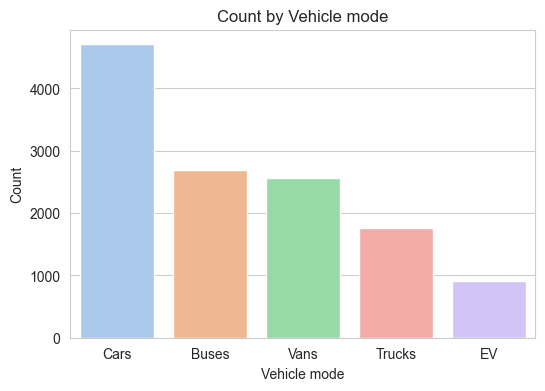

In [8]:
plt.figure(figsize=(6, 4))
sns.barplot(y="count", x="mode", data=vehicle_mode_count, palette=sns.color_palette("pastel"))
plt.title("Count by Vehicle mode")
plt.xlabel("Vehicle mode")
plt.ylabel("Count")
plt.show()

* The above bar plot shows passenger cars leading in all the modes sold at almost 5000 with the EV count at less than 1000.It shows that even though the EVs have been adopted, the cars section is still dominant.
* Buses and Vans second at almost 3000 each, showing a strong indication of many people still using public transportation in different regions of the world.
* There has been less adoption in the trucks segment, this could be due to the heavy motors needed for trucks, of which these motors might be still undergoing development by OEMs.


### Check for bias in the data set regarding powertrain representation in all EV vehicles across the globe. (Bias Detection)

C:\Users\nmnko\AppData\Local\Temp\ipykernel_47372\2884667196.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=powertrain_count, x='powertrain', y='count', palette='viridis')


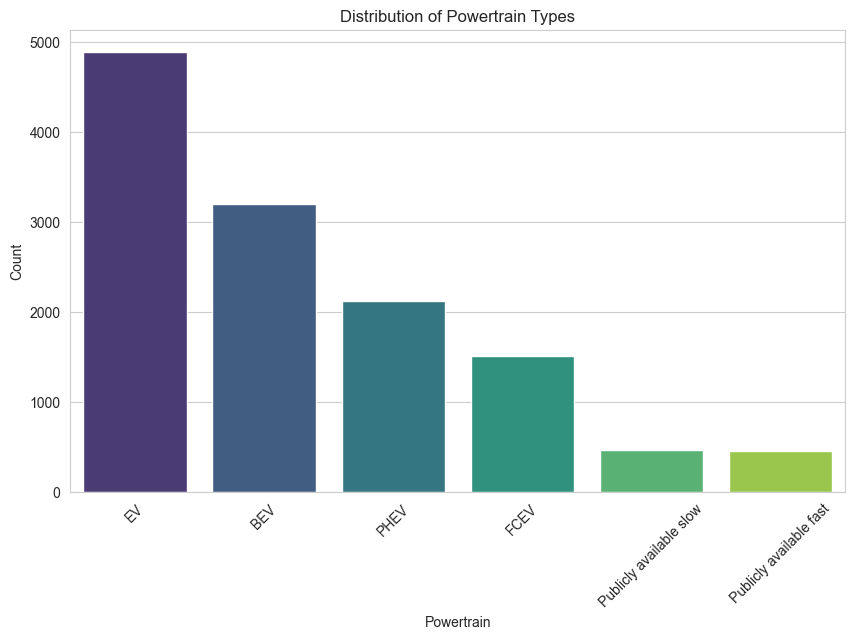

In [9]:
# Count the occurrences of each powertrain type
powertrain_count = df['powertrain'].value_counts().reset_index()
powertrain_count.columns = ['powertrain', 'count']

# Plot the distribution of powertrain types
plt.figure(figsize=(10, 6))
sns.barplot(data=powertrain_count, x='powertrain', y='count', palette='viridis')
plt.title('Distribution of Powertrain Types')
plt.xlabel('Powertrain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* As bias in data can significantly have an impact on outcomes and interpretations of any analysis. It is important to identify and address any biases to ensure the validity and fairness of the results. In this section, we will check for potential biases in the dataset in the powert
Most Common Powertrain: The tallest bar represents the most frequently occurring powertrain type, in this case it is the BEV (Battery Electric )
* Least Common Powertrain: The shortest bar indicates the least used powertrain type.
* Distribution Trends: If one or two powertrains dominate the chart, it suggests that most vehicles in the dataset use those types.
Comparisons: If there’s a gradual decrease, it shows a balanced distribution, whereas a sharp drop may indicate strong market preferences.
* If Battery Electric Vehicles (BEVs) have the highest count, it suggests a strong adoption of electric vehicles.
* A high count of  Plug-in Hybrid Electric Vehicles (PHEVs) suggests consumers prefer a transition between gasoline and electric.

C:\Users\nmnko\AppData\Local\Temp\ipykernel_47372\1607954951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='powertrain', palette='viridis')


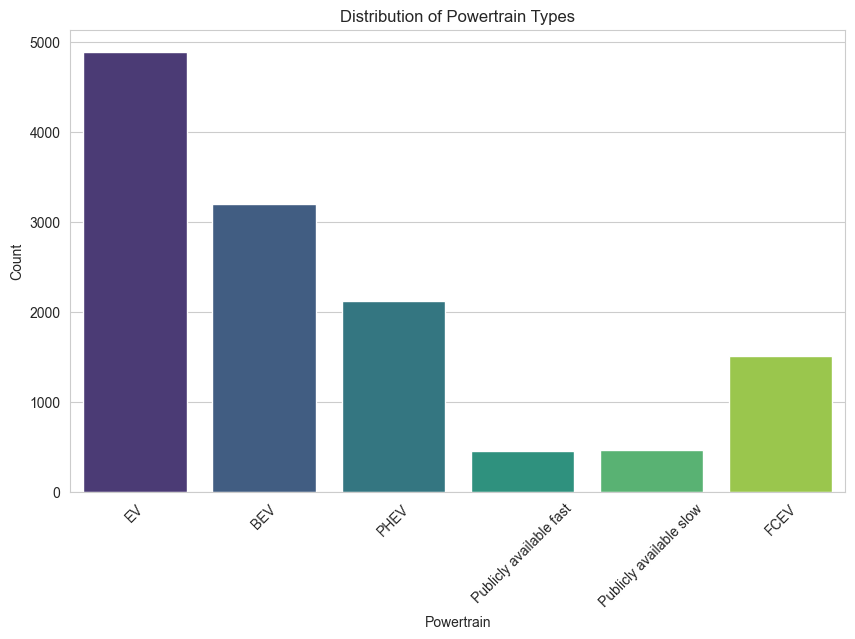

T-statistic: 3.18027636746577
P-value: 0.001482813894906329
The difference between BEV and PHEV is statistically significant.


In [10]:
from scipy.stats import ttest_ind

# Distribution analysis of powertrain types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='powertrain', palette='viridis')
plt.title('Distribution of Powertrain Types')
plt.xlabel('Powertrain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Conducting T-test for statistical significance between two powertrain types
# Example: Comparing BEV and PHEV
bev_values = df[df['powertrain'] == 'BEV']['value']
phev_values = df[df['powertrain'] == 'PHEV']['value']

# Perform T-test
t_stat, p_value = ttest_ind(bev_values, phev_values, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("The difference between BEV and PHEV is statistically significant.")
else:
    print("The difference between BEV and PHEV is not statistically significant.")

### T-Test Results Interpretation
- **T-statistic (3.180)**:
  Indicates how far the observed difference between the two groups (BEV and PHEV) is from zero, in terms of standard errors. A higher absolute T-statistic suggests stronger evidence against the null hypothesis (no difference).
- **P-value (0.00148)**:
  Represents the probability of observing such a difference (or a more extreme one) if there truly was no difference between groups. Given this p-value is well below the significance level of 0.05, we reject the null hypothesis.
  
**Conclusion**:
There is strong statistical evidence (p < 0.05) of a significant difference between BEV and PHEV.


2. Check data set for vehicle count representation per region or country.

In [11]:
df = pd.read_csv ("cleaned-file\\cleaned.csv")
vehicle_count_per_region = df['region'].value_counts().reset_index()
vehicle_count_per_region.columns = ['region', 'count']
print(vehicle_count_per_region)

                  region  count
0                  World   1250
1                 Europe   1234
2                  China   1138
3      Rest of the world    954
4                    USA    737
5                  India    702
6                   EU27    424
7            Netherlands    358
8                 France    358
9         United Kingdom    345
10               Denmark    319
11               Belgium    310
12               Germany    298
13                Norway    270
14                Sweden    269
15                 Japan    260
16           Switzerland    245
17                 Spain    245
18                Canada    240
19                 Italy    230
20                 Korea    209
21               Finland    200
22                Poland    194
23              Portugal    189
24           New Zealand    185
25                Brazil    183
26                Israel    148
27               Austria    116
28               Iceland    115
29                 Chile    103
30      

Visualise vehicle count per region to see which regions have most and least vehicle count

C:\Users\nmnko\AppData\Local\Temp\ipykernel_47372\2632216788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="count", x="region", data=vehicle_count_per_region, palette=sns.color_palette("pastel"))
C:\Users\nmnko\AppData\Local\Temp\ipykernel_47372\2632216788.py:2: UserWarning: 
The palette list has fewer values (10) than needed (54) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y="count", x="region", data=vehicle_count_per_region, palette=sns.color_palette("pastel"))


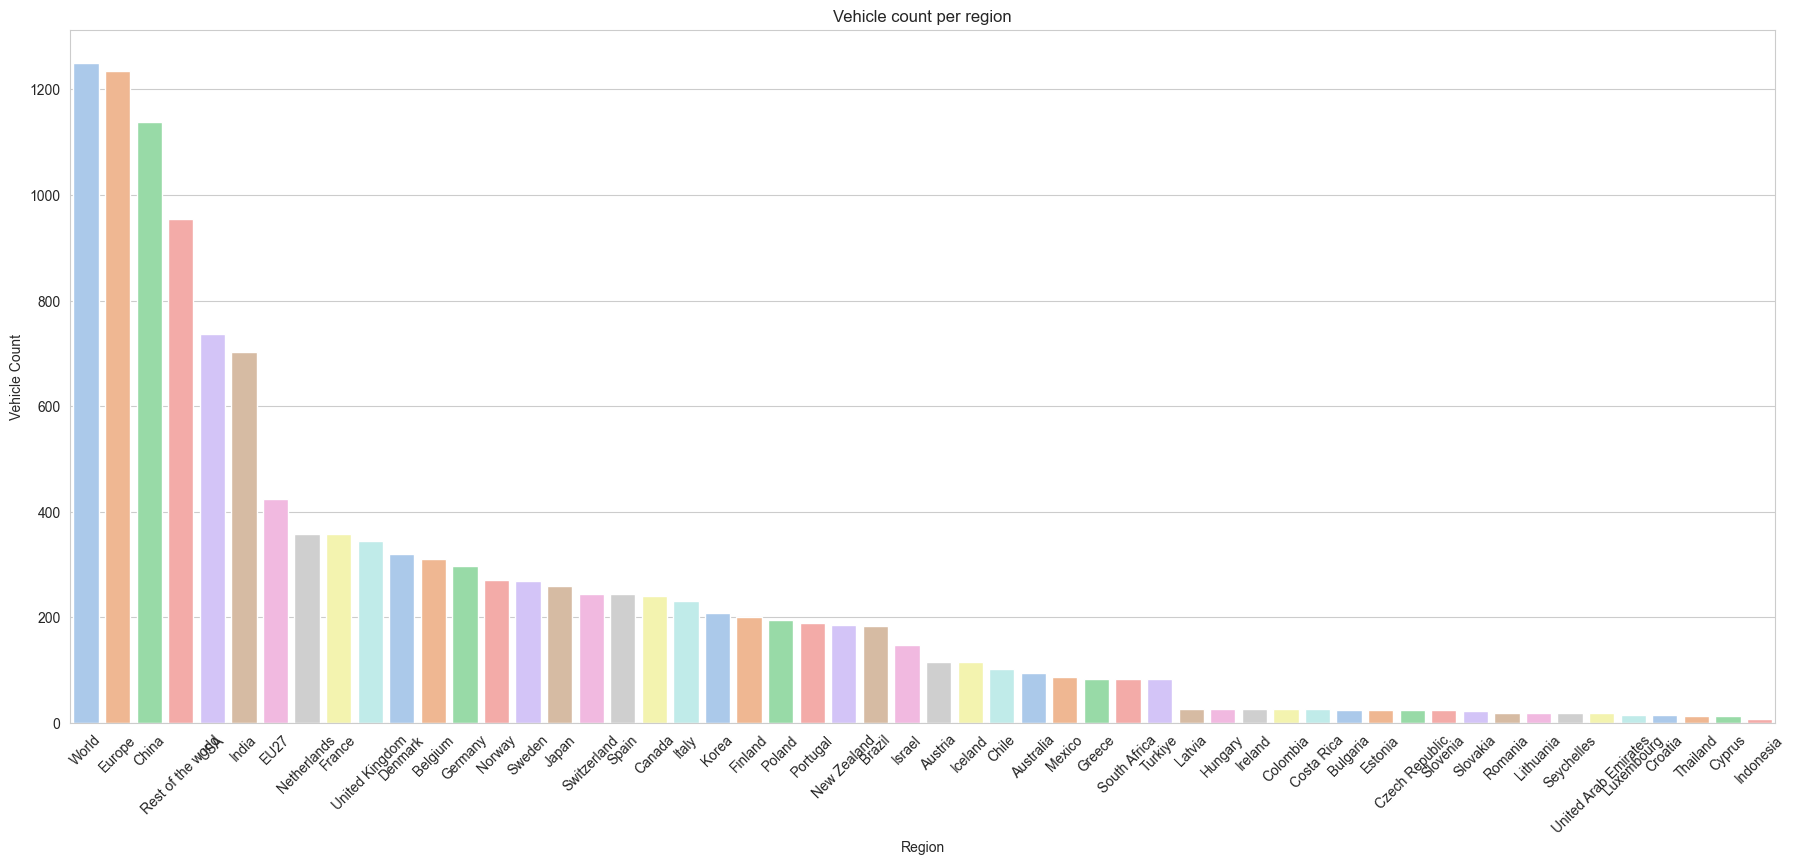

In [12]:
plt.figure(figsize=(22, 9))
sns.barplot(y="count", x="region", data=vehicle_count_per_region, palette=sns.color_palette("pastel"))
plt.title("Vehicle count per region")
plt.xlabel("Region")
plt.ylabel("Vehicle Count")
plt.xticks(rotation=45)
plt.show()

* From the bar plot above it shows that Europe, China and the USA are leading in overall vehicle sales count globally, where as Croatia, Thailand, Cyprus and Indonesia have the least sales numbers of electric vehicles.
* However, the bar plot shows a combined world vehicle count at 1300 which is almost the same with Europe at 1290 and this is not adding up as the world figure should be way up high as it is assumed that it is adding all the vehicle counts for all the world regions.

After the vehicle count per region above, below is a Scatter plot showing sales value spent per region (region against the numerical variable of value)

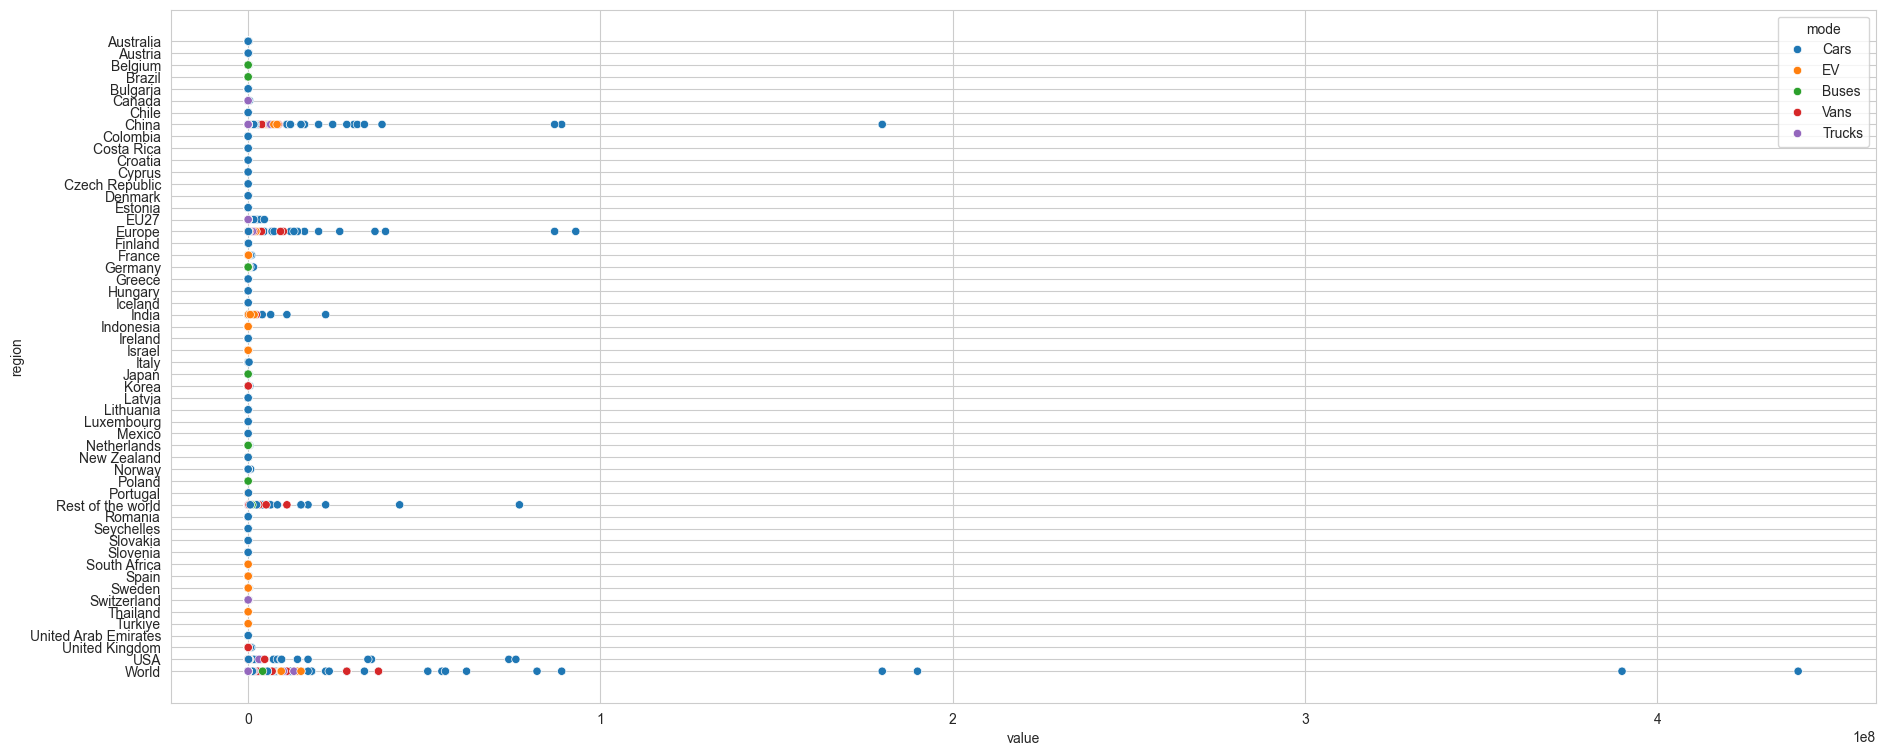

In [13]:
fig, axes = plt.subplots(figsize=(22,9))
sns.scatterplot(data=df, x='value', y='region', hue='mode') 
plt.show()

* The scatter plot above compares the overal vehicle value of sales for all the regions of the world by countries for all the vehicle modes.
* The plot shows that the sales values for the world combined car numbers at almost 500 million, with China taking the lead on passenger cars at almost 200 million and is the only outlier on the plot compaired to the rest of the countries, this is followed closely by Europe at almost 100 million followed by the rest of the world and USA at approximately 90 million jontly. 
* China and Europe are leading in EV sales but are still below 100 million sales jointly at the same position, which shows that there has been more adoption of EVs in both locations compared to the USA and Rest of the world.
* However, China, Europe, USA and Rest of the world are leading consecutively in sales for EVs and all the other modes.

Visualise vehicles per region using the pair plot 

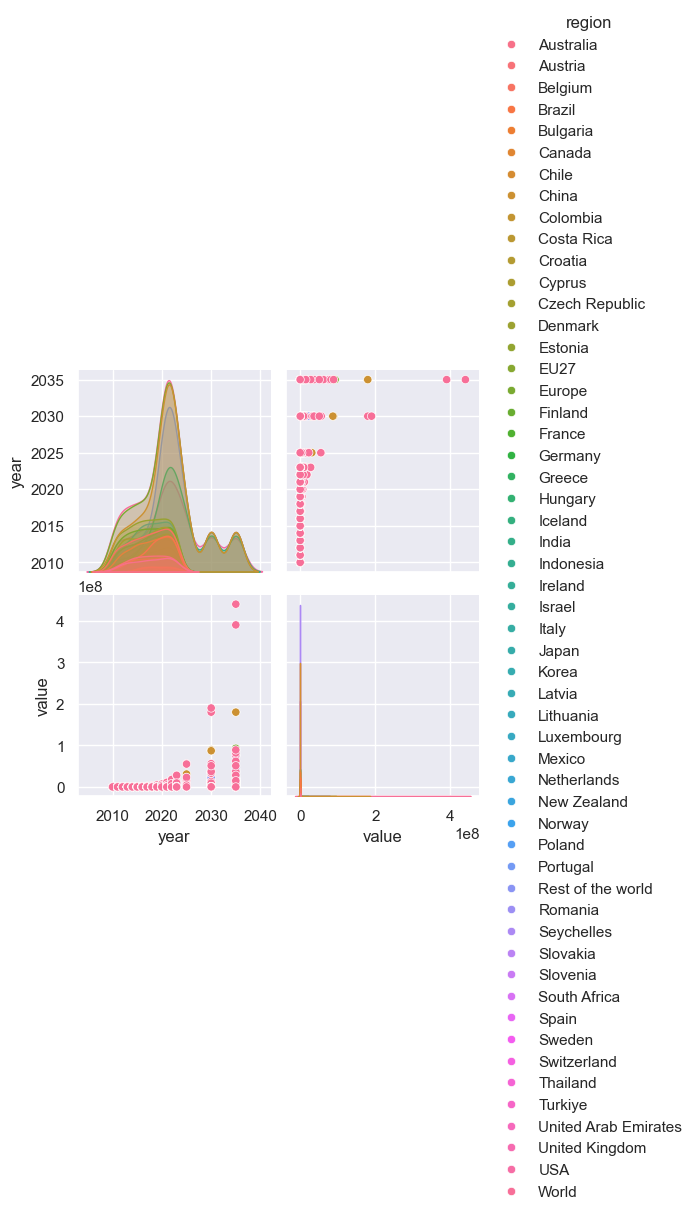

In [14]:
# visualising the pair plot for the data (Ref:https://www.kaggle.com/code/pranavkumarmehta/global-ev-sales-2010-2024-analysis-eda#To-visualixe-the-pairplot-of-data)
sns.set(rc = {"figure.figsize" : (22,9)})
sns.pairplot(df, hue = "region")
plt.show()

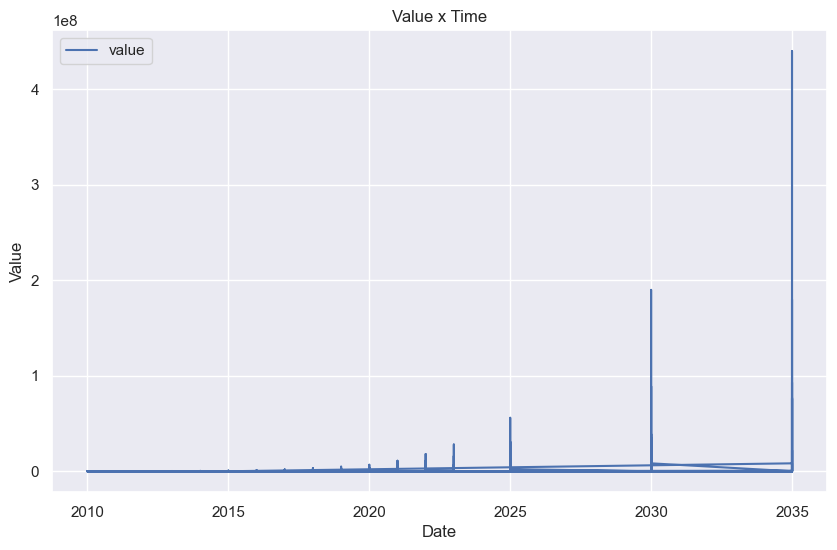

In [15]:
df.plot(kind='line',y='value',x='year',figsize=(10,6),title='Value x Time',xlabel='Date',ylabel='Value')
       
plt.show()

Visualise the value category projection over the years

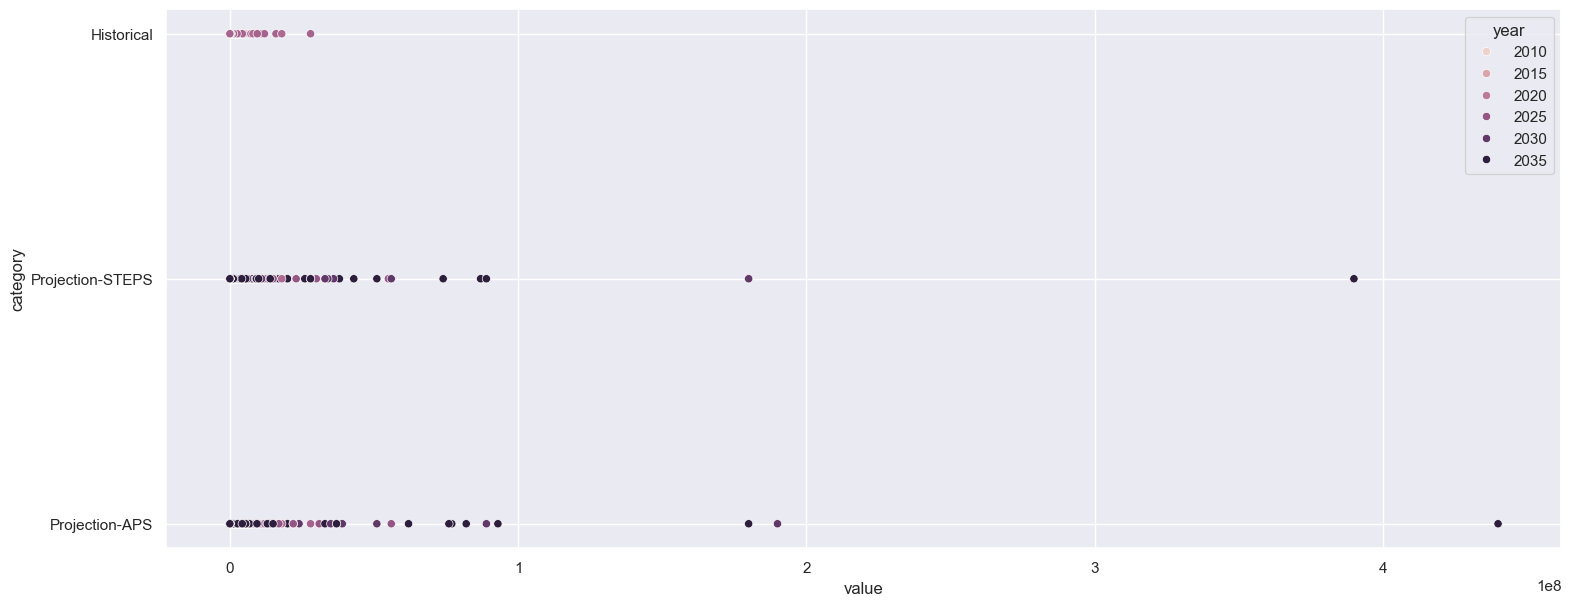

In [16]:
fig, axes = plt.subplots(figsize=(18,7))
sns.scatterplot(data=df, x='value', y='category', hue='year') 
plt.show()

On the above scatter plot 

Box plot to detect outliers in value variable

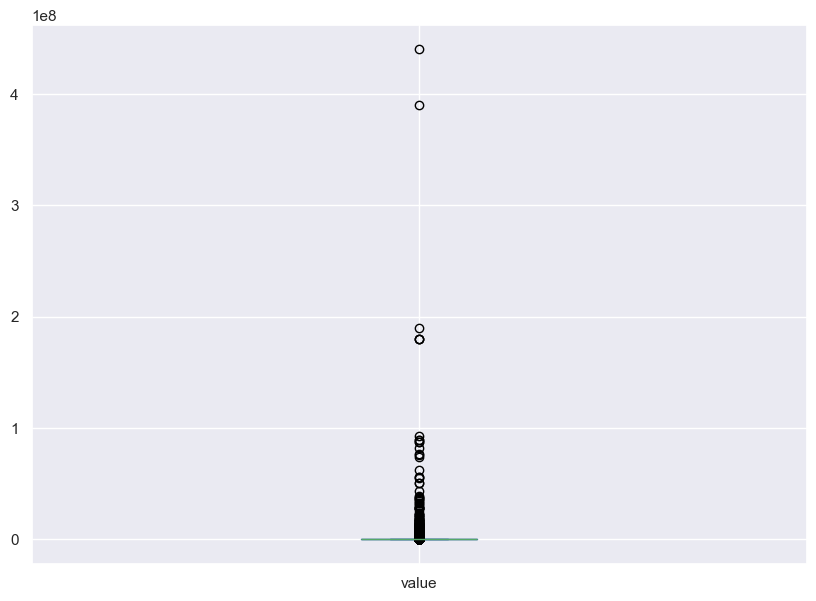

In [17]:
df.plot(kind='box',y=['value'],figsize=(10,7))
plt.show()

The Box plot above shows that most of the data is an out lier and the median is around 0.2.

C:\Users\nmnko\AppData\Local\Temp\ipykernel_47372\3858982309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="unit", y="value", data=df, palette="coolwarm")


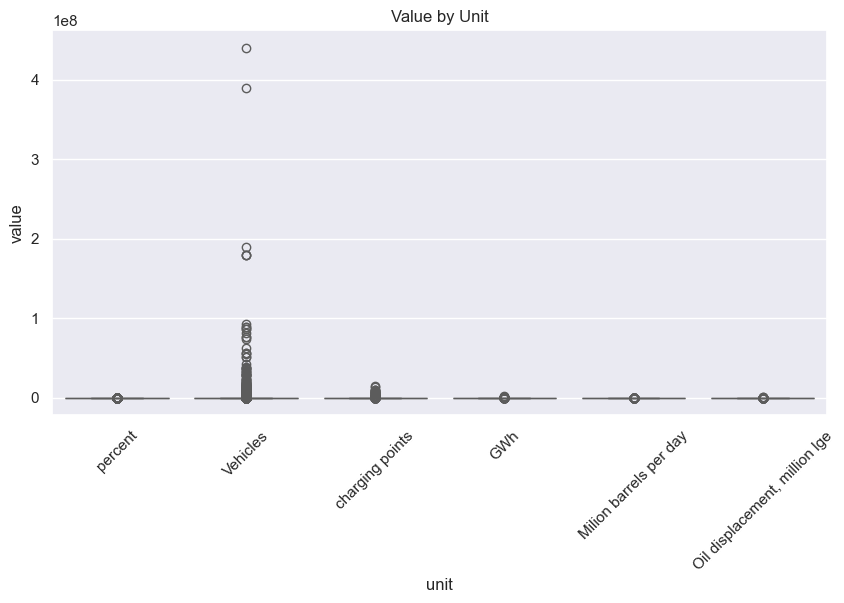

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="unit", y="value", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Value by Unit")
plt.show()

Box plot to detect outliers in the data set

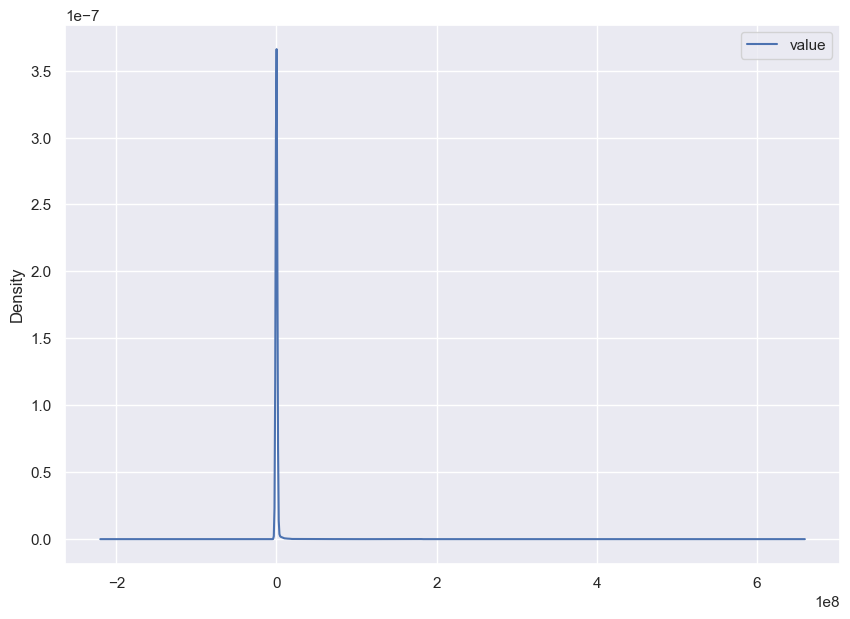

In [19]:
df.plot(kind='kde',y=['value'],figsize=(10,7))
plt.show()

## Bar plots to show other categorical variables against the count variable

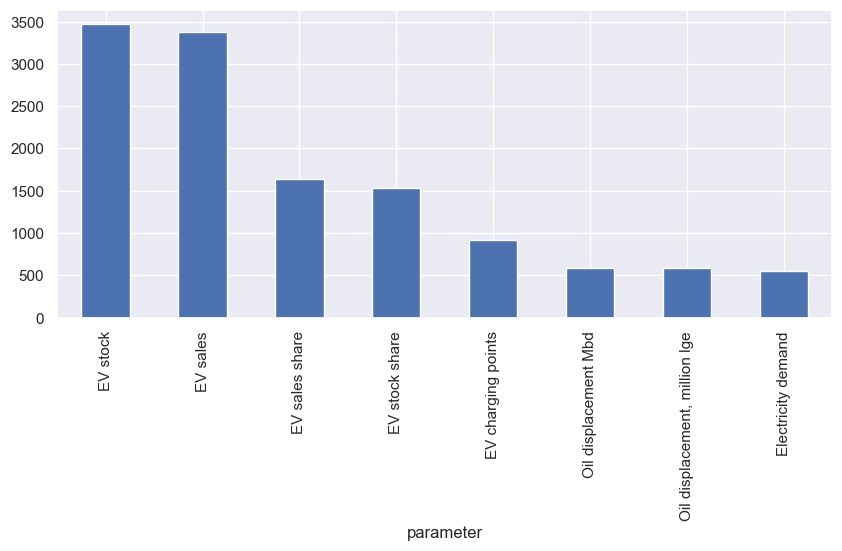

In [20]:
df.value_counts('parameter').plot(kind='bar',figsize=(10,4))
plt.show()

* The bar plot above shows a leading number of the EV stock of almost 3500, but with a less than half of EV charging points of approximately 900.
* Surprisingly, the electricity demand figure has remained low considering the increase in EV sales.

Bar plot to show other categorical variables against the count variable

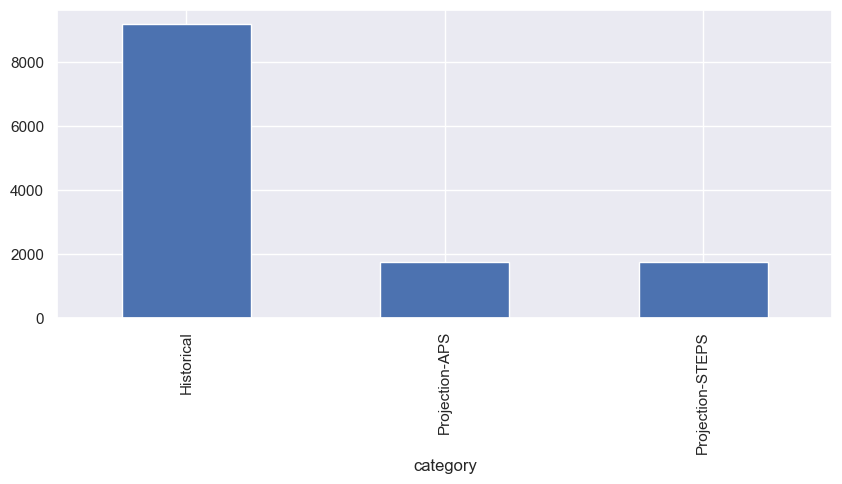

In [21]:
df.value_counts('category').plot(kind='bar',figsize=(10,4))
plt.show()

### Analyse the unit column by vehicles only to narrow down eletric vehicles only, then plot a line chat by sales of the top 10 countries 

In [22]:
vehicles_df = df[df['unit'] == 'Vehicles']
print(vehicles_df)
display(vehicles_df.head())
display(vehicles_df.shape)
display(vehicles_df.describe())

          region          category parameter  mode powertrain  year      unit  \
2      Australia        Historical  EV sales  Cars        BEV  2011  Vehicles   
3      Australia        Historical  EV stock  Cars        BEV  2011  Vehicles   
4      Australia        Historical  EV stock  Cars        BEV  2012  Vehicles   
5      Australia        Historical  EV sales  Cars        BEV  2012  Vehicles   
8      Australia        Historical  EV stock  Cars       PHEV  2012  Vehicles   
...          ...               ...       ...   ...        ...   ...       ...   
12631      World  Projection-STEPS  EV stock  Vans       FCEV  2035  Vehicles   
12632      World  Projection-STEPS  EV stock  Vans       PHEV  2035  Vehicles   
12633      World  Projection-STEPS  EV stock  Cars        BEV  2035  Vehicles   
12634      World  Projection-STEPS  EV stock  Cars       FCEV  2035  Vehicles   
12635      World  Projection-STEPS  EV stock  Cars       PHEV  2035  Vehicles   

             value  
2     

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


(6842, 8)

,year,value
count,6842.000000,6.842000e+03
mean,2019.883221,7.503803e+05
std,5.352174,9.307153e+06
min,2010.000000,1.000000e-03
25%,2016.000000,6.725000e+01
50%,2020.000000,1.200000e+03
75%,2022.000000,2.200000e+04
max,2035.000000,4.400000e+08


Plot top 10 countries by EV sales

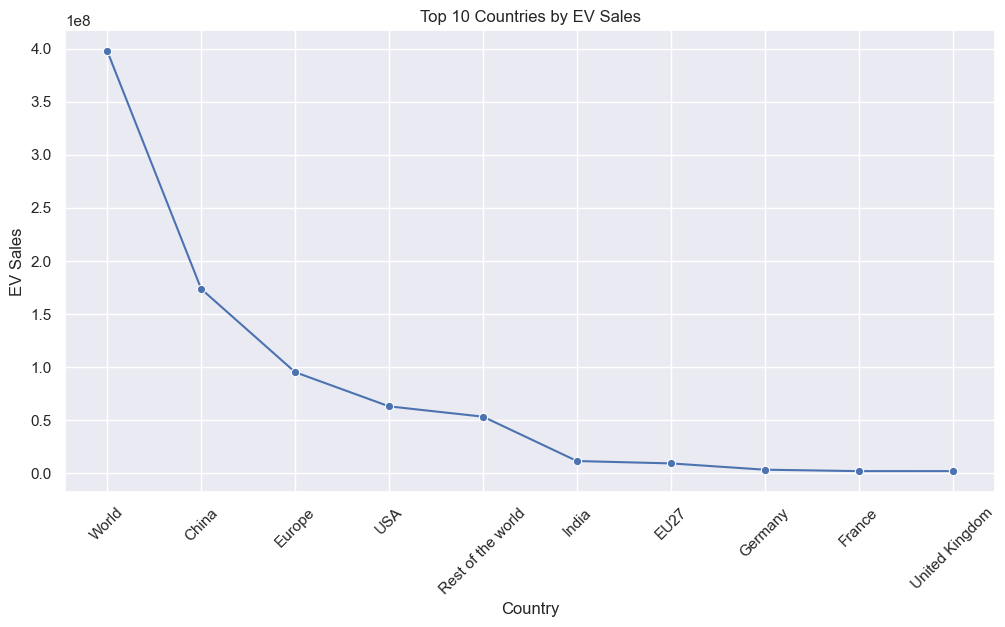

In [23]:
# Filter the dataframe for EV sales
ev_sales_df = df[df['parameter'] == 'EV sales']

# Group by region and sum the sales
ev_sales_by_region = ev_sales_df.groupby('region')['value'].sum().reset_index()

# Sort by sales and get the top 10 countries
top_10_countries = ev_sales_by_region.sort_values(by='value', ascending=False).head(10)

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_countries, x='region', y='value', marker='o')
plt.title('Top 10 Countries by EV Sales')
plt.xlabel('Country')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)
plt.show()

* Out of the top 10 countries EV sales have a negative correlation from the highest sales in China to the lowest for the UK within the top 10 group. China stands out with a clear lead in the EV sales.

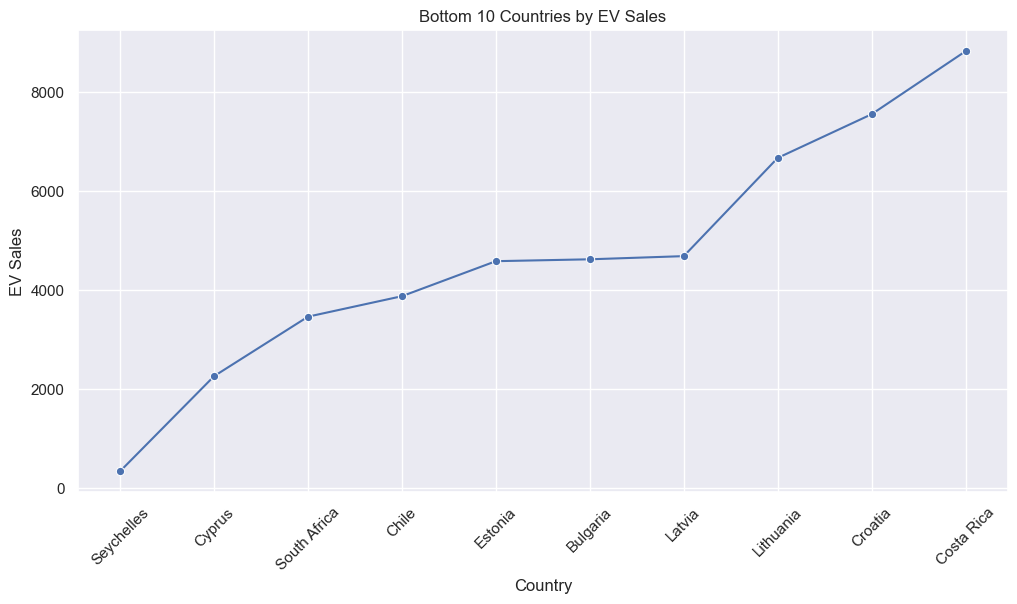

In [24]:
# Bottom 10 countries by EV sales
bottom_10_countries = ev_sales_by_region.sort_values(by='value', ascending=True).head(10)

# EV sales for bottom countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=bottom_10_countries, x='region', y='value', marker='o')
plt.title('Bottom 10 Countries by EV Sales')
plt.xlabel('Country')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)
plt.show()

* The line graph of the bottom 10 countries in EV sales shows a steady rise in the sales with Costa rica leading the way and Seychelles at the bottom.
* The rest of the countries show a steady adoption of EVs with Lithuania having sharp increase, this could be the availability of EV infrastructure being built at a faster rate than the other bottom ten countries.

### Electric vehicles sales trend from 2010 and the projected growth upto 2035 by Powertrain Type

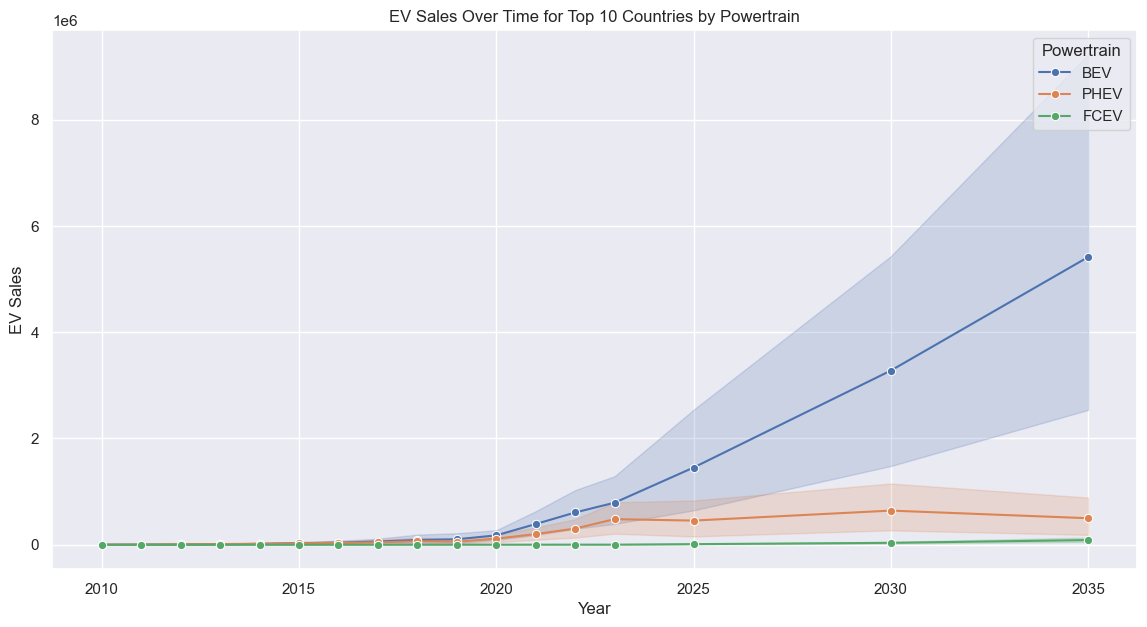

In [25]:
# Filter the dataframe for the top 10 countries
top_10_countries_list = top_10_countries['region'].tolist()
top_10_ev_sales_df = ev_sales_df[ev_sales_df['region'].isin(top_10_countries_list)]

# Plot the line chart
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_10_ev_sales_df, x='year', y='value', hue='powertrain', marker='o')
plt.title('EV Sales Over Time for Top 10 Countries by Powertrain')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.legend(title='Powertrain')
plt.show()

* The line chart contrasts trends of different powertrains uptake from 2010 and the projections of adoption upto 2035 for the top 10 countries.
* Out of all the powertrains, BEV (Battery Electric Vehicle) is leading in sales value with approximately 5.8 million projected for 2035. 
* The PHEV (Plugin Hybrid Electric Vehicles) is projected to reach sales of upto reach 1.5 million.
* FCEV (Fuell Cell Electric vehicle) has the lowest trends and lowest projection with no growth from 2010 to 2035. This could be due to difficulties in producing, harnessing and storage of Hydrogen as it is the main input for FCEV powertrains.
* The line plot also shows that since 2010 only the FCEVs were dominant un til 2019, when other powertrains started catching up and BEV had a sudden sharp increase in sales from 2020 with PHEV following behind with a steady increase.

Total sales trend and projection to 2035 for all EVs and all continents

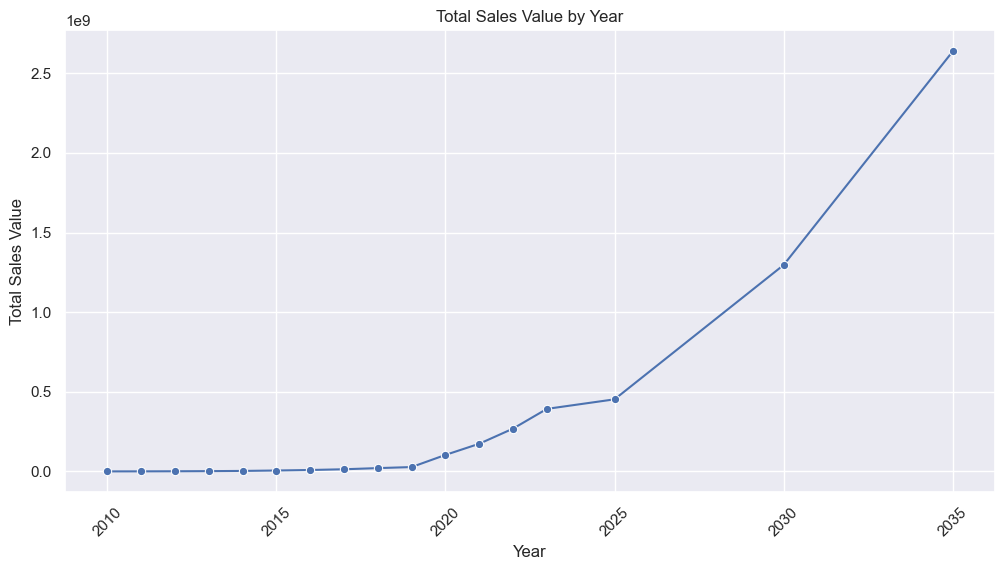

In [26]:
# Group by year and sum the sales values
total_sales_by_year = df.groupby('year')['value'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_sales_by_year, x='year', y='value', marker='o')
plt.title('Total Sales Value by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

* The line plot shows that the growth was constant from 2010 upto 2019 where there was a sudden jump in the sales value where it has reached almost 0.5 billion in 2025.
* From 2025, the projection is that there will be a further sharp increase in total sales value hitting upto 2.7 billion by 2035.

### Mapping of countries to continents

In [27]:
# Create a mapping of countries to continents
country_to_continent = {
    'Australia': 'Oceania', 'Austria': 'Europe', 'Belgium': 'Europe', 'Brazil': 'South America',
    'Bulgaria': 'Europe', 'Canada': 'North America', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cyprus': 'Europe',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'EU27': 'Europe', 'Estonia': 'Europe',
    'Europe': 'Europe', 'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe',
    'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia',
    'Italy': 'Europe', 'Japan': 'Asia', 'Korea': 'Asia', 'Latvia': 'Europe', 'Lithuania': 'Europe',
    'Luxembourg': 'Europe', 'Mexico': 'North America', 'Netherlands': 'Europe', 'New Zealand': 'Oceania',
    'Norway': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe', 'Slovakia': 'Europe',
    'Slovenia': 'Europe', 'South Africa': 'Africa', 'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Turkiye': 'Asia', 'USA': 'North America', 'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe',
    'World': 'Global', 'Rest of the world': 'Global'
}

# Add a continent column to the dataframe
df['continent'] = df['region'].map(country_to_continent)

# Filter the dataframe by continent
asia_df = df[df['continent'] == 'Asia']
europe_df = df[df['continent'] == 'Europe']
north_america_df = df[df['continent'] == 'North America']
south_america_df = df[df['continent'] == 'South America']
oceania_df = df[df['continent'] == 'Oceania']
africa_df = df[df['continent'] == 'Africa']
global_df = df[df['continent'] == 'Global']

# Display the filtered dataframes
print("Asia DataFrame:")
display(asia_df.head())

print("Europe DataFrame:")
display(europe_df.head())

print("North America DataFrame:")
display(north_america_df.head())

print("South America DataFrame:")
display(south_america_df.head())

print("Oceania DataFrame:")
display(oceania_df.head())

print("Africa DataFrame:")
display(africa_df.head())


Asia DataFrame:


,region,category,parameter,mode,powertrain,year,unit,value,continent
1071,China,Historical,Electricity demand,Buses,EV,2010,GWh,150.0,Asia
1072,China,Historical,Electricity demand,Vans,EV,2010,GWh,3.0,Asia
1073,China,Historical,Electricity demand,Cars,EV,2010,GWh,46.0,Asia
1074,China,Historical,EV sales,Cars,BEV,2010,Vehicles,1100.0,Asia
1075,China,Historical,EV sales,Vans,BEV,2010,Vehicles,120.0,Asia


Europe DataFrame:


,region,category,parameter,mode,powertrain,year,unit,value,continent
94,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350.0000,Europe
95,Austria,Historical,EV stock share,Cars,EV,2010,percent,0.0079,Europe
96,Austria,Historical,EV stock share,Cars,EV,2011,percent,0.0220,Europe
97,Austria,Historical,EV charging points,EV,Publicly available fast,2011,charging points,0.1000,Europe
98,Austria,Historical,EV charging points,EV,Publicly available slow,2011,charging points,0.1000,Europe


North America DataFrame:


,region,category,parameter,mode,powertrain,year,unit,value,continent
728,Canada,Historical,EV sales share,Trucks,EV,2010,percent,0.0011,North America
729,Canada,Historical,EV stock,Cars,FCEV,2010,Vehicles,5.0000,North America
730,Canada,Historical,EV sales,Trucks,BEV,2010,Vehicles,1.0000,North America
731,Canada,Historical,EV sales,Trucks,BEV,2011,Vehicles,2.0000,North America
732,Canada,Historical,EV stock,Cars,PHEV,2011,Vehicles,300.0000,North America


South America DataFrame:


,region,category,parameter,mode,powertrain,year,unit,value,continent
520,Brazil,Historical,EV sales,Cars,BEV,2010,Vehicles,10.00000,South America
521,Brazil,Historical,EV sales share,Cars,EV,2010,percent,0.00035,South America
522,Brazil,Historical,EV sales share,Cars,EV,2011,percent,0.00028,South America
523,Brazil,Historical,EV sales,Cars,BEV,2011,Vehicles,8.00000,South America
524,Brazil,Historical,EV sales,Cars,BEV,2012,Vehicles,22.00000,South America


Oceania DataFrame:


,region,category,parameter,mode,powertrain,year,unit,value,continent
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039,Oceania
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650,Oceania
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000,Oceania
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000,Oceania
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000,Oceania


Africa DataFrame:


,region,category,parameter,mode,powertrain,year,unit,value,continent
9365,South Africa,Historical,EV stock share,Cars,EV,2013,percent,0.00052,Africa
9366,South Africa,Historical,EV sales share,Cars,EV,2013,percent,0.00750,Africa
9367,South Africa,Historical,EV sales,Cars,BEV,2013,Vehicles,34.00000,Africa
9368,South Africa,Historical,EV stock,Cars,BEV,2013,Vehicles,34.00000,Africa
9369,South Africa,Historical,EV stock,Cars,BEV,2014,Vehicles,48.00000,Africa


Showing total EV sales by continent to show which continents are leading with EV sales

C:\Users\nmnko\AppData\Local\Temp\ipykernel_47372\1871843705.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ev_sales_by_continent, x='continent', y='value', palette='viridis')


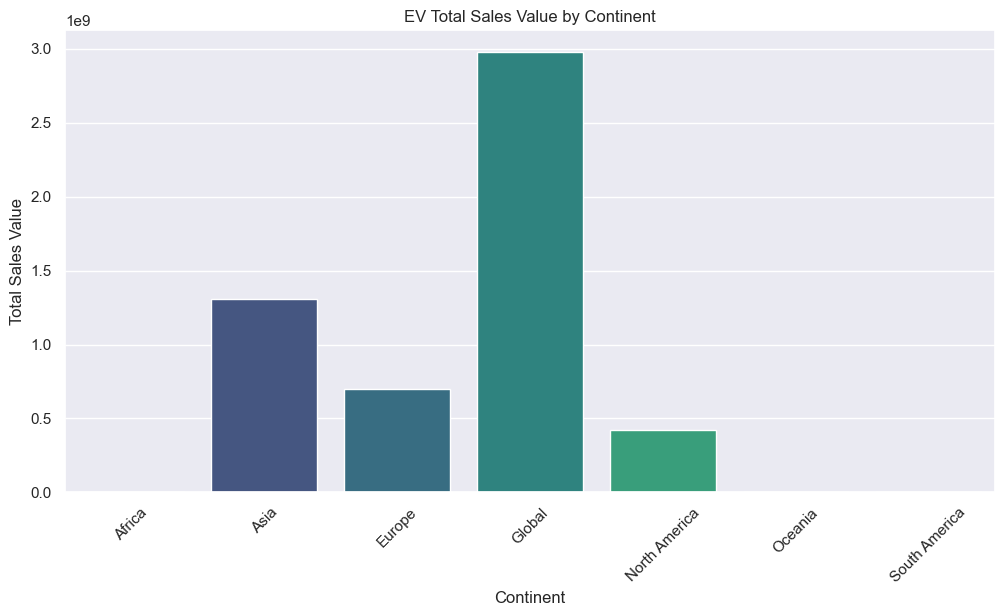

In [28]:
# Group by continent and sum the sales values
ev_sales_by_continent = df.groupby('continent')['value'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=ev_sales_by_continent, x='continent', y='value', palette='viridis')
plt.title('EV Total Sales Value by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

* The bar chart above shows that the continent of Asia is in the lead with 1.3 billion total sales, with Europe following at approximately 7 million and North America at approximately 400 million in total sales value. Therefore, we can infer that there is a correlation between continent and total sales value.
* The bar chart gives a clear contrast of sales globally, with a total global value of 2.9 billion sales value.

### Correlation heatmap of the data set

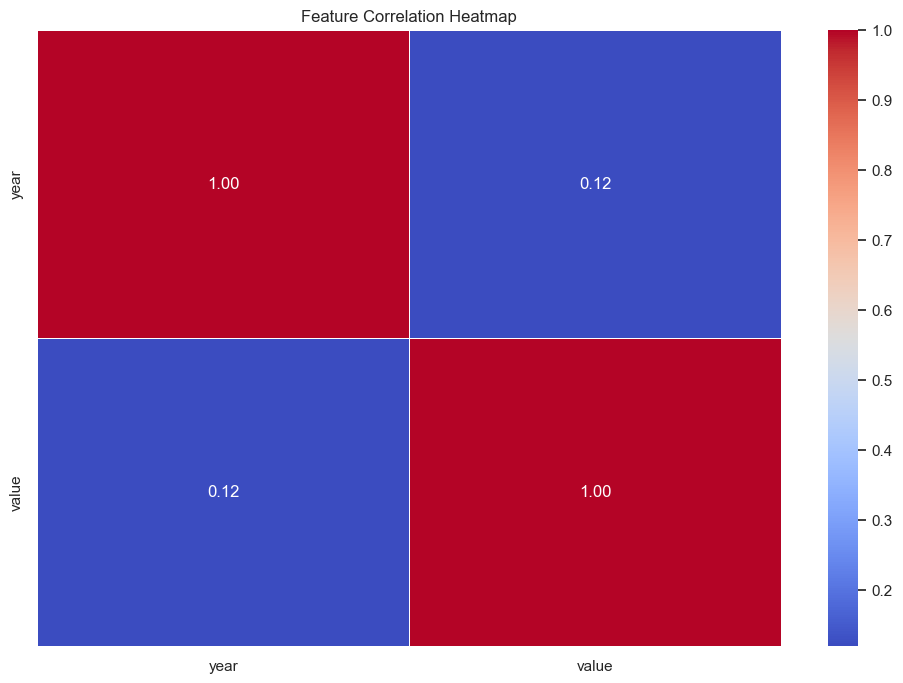

In [29]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

* From the heat map, there is a strong correlation between the sales value and the year. This is because as years go by the number of EVs is projected to increase to 2035. 
* There will be more adoption of EVs due to increased funding in infrastructure that supports EVs like charging stations. The number of charging points is expected to rise, therefore having a positive correlation with time.

# 3. Visualisation insights, evaluations and conclusions

* The project has repeatedly showed that there was a constant or flat growth in total EV sales from 2010 to atleast 2019, where there was a sudden up tick in total sales figures. This is a sign that there was more adoption of electric vehicles by the public especially in China, Europe and the USA. This could have also been due to the availability of EV infrastructure in those countries due to the contries government legislation.
* The total sales are projected to reach 2.7 billion in 2035 from 0.1 billion in 2017.
* The charts have also shown that there is clear correlation between global EV total sales with the projected years to come all the way to 2035, showing a strong growth and adoption across the globe.
* Various visualisation methods have proved time and again that China is leading at the front with total EV sales across all types of EV powertrains like BEV, PHEV and FCEV. This is followed by Europe, USA and the rest of the world at last.
* The EV sales by powertrain, we gain insights that the BEV powertrain is growing faster than the other powertrains, which shows that customers like a straight full electric car without any hybrid in its fuel sorce. Which may prove that customers are avoiding complications of having more than one fuel type for their vehicles.
* For the bottom 10 countries in the EV sales, Seychelles is at the bottom of the pack which shows a lower adoption to EVs, this could be because of lack of infrastructure and slower government change in legislation to EV adoption.
* Total sales value by continents, Africa, Oceania and South America are the least continents with EV sales, growth or adoptation. 
* Overally, the EV sales trend is on the up and projected to grow through 2035.

